In [1]:
import pandas as pd
import numpy as np
import spacy
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from bs4 import BeautifulSoup
from html import unescape

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
train = pd.read_csv("Corona_NLP_train.csv")
test = pd.read_csv("Corona_NLP_test.csv")
data = pd.concat([train, test])

In [28]:
len(data)

44955

In [29]:
data.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [30]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [31]:
data["Sentiment"].value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

In [32]:
data["Location"].value_counts()

United States                     603
London, England                   568
London                            565
New York, NY                      429
Washington, DC                    411
                                 ... 
London, Amsterdam, New York         1
New York City, baby!                1
San FranciscoOaklandSan Jose      1
Andorra                             1
The Mountains, Ireland.             1
Name: Location, Length: 13127, dtype: int64

# Preprocessing and EDA

To perform an exploratory data analysis, the 5 classes of the Sentiment column merged to 3 classes so that we have only Negative, Neutral, and Positive tags.

In [3]:
data = data.copy().iloc[:, 3:]

In [4]:
data.head()

,TweetAt,OriginalTweet,Sentiment
0,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,16-03-2020,My food stock is not the only one which is emp...,Positive
4,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
def makeClean(text):
    #Removing escaped tags if there is any
    text = BeautifulSoup(unescape(text), 'lxml').text
    #Removing the url links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    #Removing the html tags
    text = re.sub(r'<.*?>', '', text)
    
    #Removing mentions
    text = re.sub(r'@\w+','',text)
    #Removing hashtags
    text=re.sub(r'#\w+','',text)
    
    #Lowercasing the text 
    text = text.lower()
    #Removing numbers
    text = re.sub(r"(?<=\d)(st|nd|rd|th)\b", '', text)
    text = re.sub('[0-9]+', '', text)
    
    #Converting the contractions into their corresponding standard form 
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

   
    #Removing punctuation
    for char in text:
        if char in string.punctuation:
            text=text.replace(char, '')
    #Remiving the extra spaces
    text = re.sub(r"\s+"," ",text).strip()
    
    return(text)


# Tokenizing the data using NLTK package
stopwords = nltk.corpus.stopwords.words('english')

# def nltkPreprocess(text):
# #     stemmer = nltk.PorterStemmer()
#     lemmatizer = nltk.WordNetLemmatizer()
#     tokens = word_tokenize(text)
# #     tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    
#     return [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords]


# #Tokenizing the data using spacy package

# nlp = spacy.load("en_core_web_sm")
# def spacyPreprocess(text):
#     doc = nlp(text)
#     return [token.lemma_ for token in doc if token.lemma_.isalpha() and not token.is_stop]

def nltkPreprocess(text):
#     stemmer = nltk.PorterStemmer()
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = word_tokenize(text)
#     tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    tokensList = ' '.join(lemmatizer.lemmatize(token) for token in tokens if token not in stopwords)
    return str(tokensList).strip('[]')
#     return tokensList


#Tokenizing the data using spacy package

nlp = spacy.load("en_core_web_sm")
def spacyPreprocess(text):
    doc = nlp(text)
    tokensList = " ".join(token.lemma_ for token in doc if token.lemma_.isalpha() and not token.is_stop)

    return tokensList

In [6]:
import warnings
warnings.filterwarnings('ignore')
#Applying the cleaning function on the original tweets
data["CleanedTweet"] = data["OriginalTweet"].map(lambda text: makeClean(text))

#Tokenizing by spacy
data["Tokenized_Spacy"] = data["CleanedTweet"].map(lambda text:spacyPreprocess(text))

#Tokenizing by NLTK
#data["Tokenized_nltk"] = data["CleanedTweet"].map(lambda text:nltkPreprocess(text))

In [7]:
data.head()

,TweetAt,OriginalTweet,Sentiment,CleanedTweet,Tokenized_Spacy
0,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,
1,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk neighbour family exchange phone nu...
2,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworth elderly disabl...
3,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,food stock panic food need stay calm stay safe
4,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outbr...,ready supermarket outbreak paranoid food stock...


### Analysing the length of the tweets

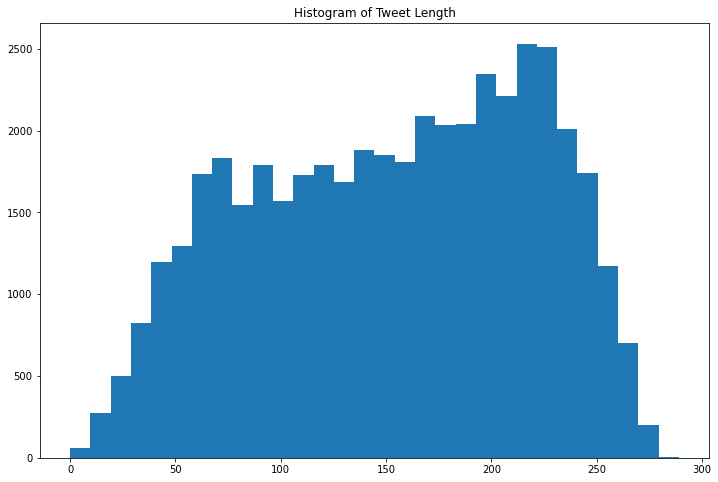

In [38]:
data["TweetLength"] = data["CleanedTweet"].map(len)
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.hist(data['TweetLength'], bins=30)
ax.set_title('Histogram of Tweet Length')
ax.set_xlabel('')
plt.show()

### Some statistics related to the different categories

In [8]:
#Inserting the Sentiment column into the new data frame. A 3-class Sentiment column was also created to have Negative, Neutral, and Positive classes.

data["Sentiment2"]= data["Sentiment"].map({"Neutral":"Neutral", "Positive":"Positive", "Negative":"Negative", "Extremely Negative":"Negative", "Extremely Positive":"Positive"})

In [40]:
data.head()

,TweetAt,OriginalTweet,Sentiment,CleanedTweet,Tokenized_Spacy,TweetLength,Sentiment2
0,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,,7,Neutral
1,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk neighbour family exchange phone nu...,237,Positive
2,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworth elderly disabl...,102,Positive
3,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,food stock panic food need stay calm stay safe,165,Positive
4,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outbr...,ready supermarket outbreak paranoid food stock...,186,Negative


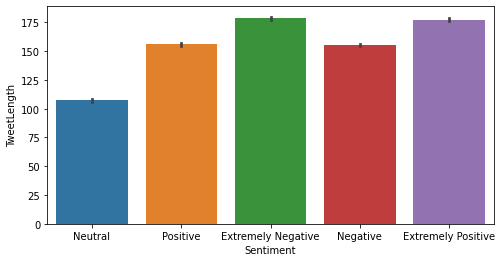

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(x='Sentiment', y='TweetLength' , data=data)
plt.show()

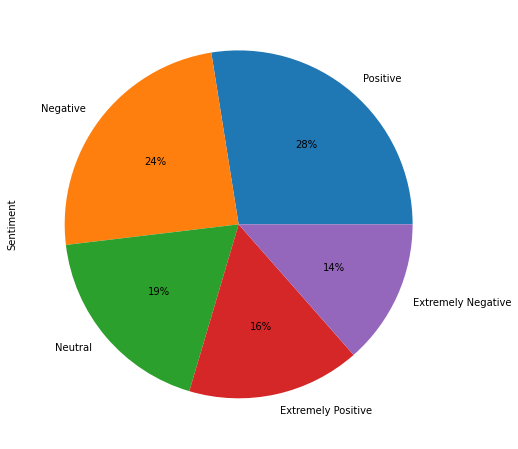

In [42]:
plt.figure(figsize=(12,8))
data["Sentiment"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

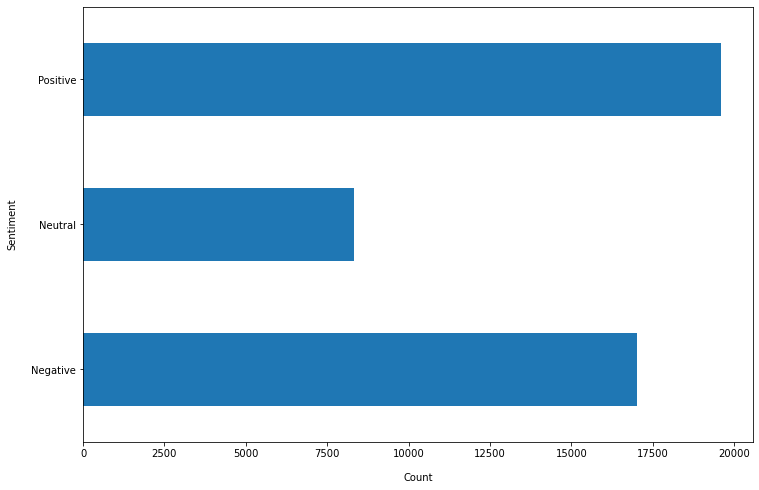

In [43]:
fig, ax = plt.subplots(1,1, figsize=(12,8), )
data['Sentiment2'].value_counts().sort_index().plot(kind='barh', ax=ax)

ax.set_xlabel("Count", labelpad=14)
ax.set_ylabel("Sentiment", labelpad=14);
# ax.set_title(" Sentiment", y=1.02);




In [44]:
from wordcloud import WordCloud
def wordCloudCreator(sentimentCol="Sentiment2",Sentiment="Positive", TokenizedTweets="Tokenized_Spacy",stopwords=None, N=300):
    '''This function returns a world cloud of tweets regarding the epecified sentiment.'''
    Data = data[data[sentimentCol]==Sentiment]
    Tweets = Data[TokenizedTweets].to_string(index = False)
    wordCloud = WordCloud(width = 800, height = 800,max_words=N,stopwords = stopwords,
                          background_color ='white', min_font_size = 10).generate(Tweets)
    return(wordCloud)
    

## Word cloud using spacy data

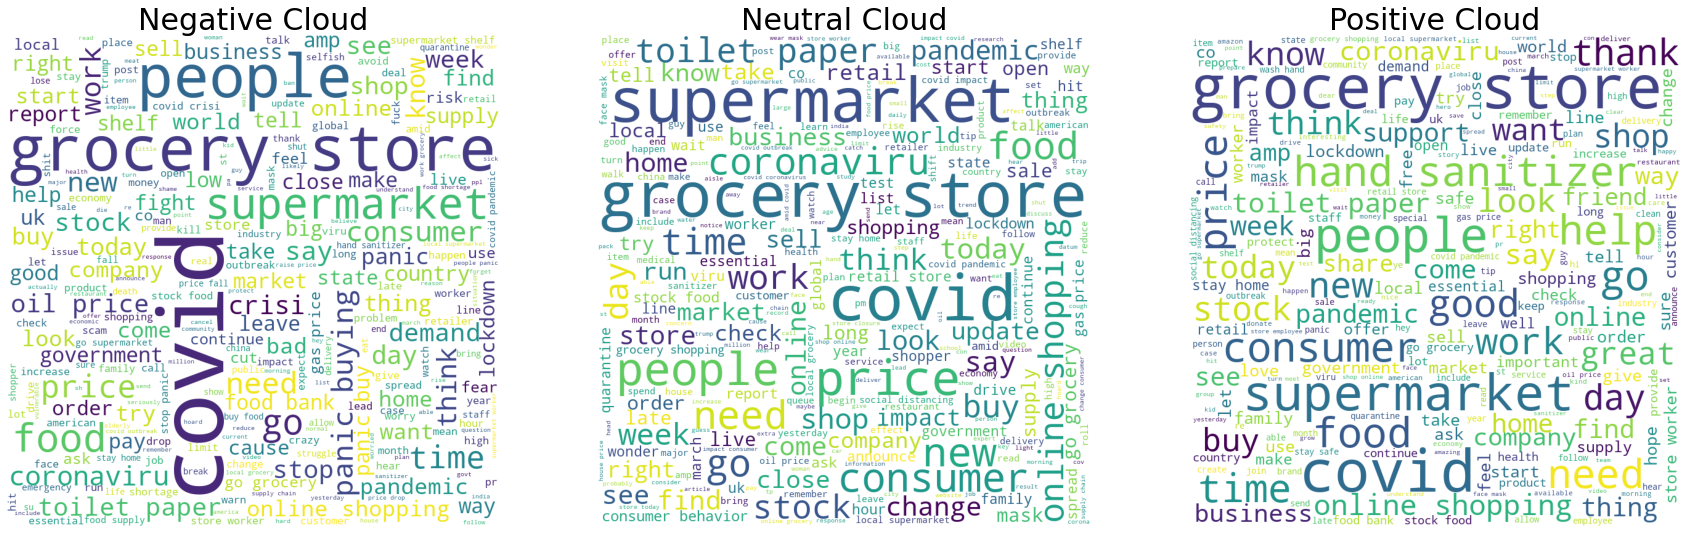

In [45]:

#Positive wordCloud
pos_wordCloud = wordCloudCreator(Sentiment="Positive")
#Negative wordCloud
neg_wordCloud = wordCloudCreator(Sentiment="Negative")
#Neutral wordCloud
neut_wordCloud = wordCloudCreator(Sentiment="Neutral")



fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))

ax1.imshow(neg_wordCloud)
ax1.set_title('Negative Cloud', fontsize = 30)
ax1.axis('off')
ax2.imshow(neut_wordCloud)
ax2.set_title('Neutral Cloud', fontsize = 30)
ax2.axis('off')
ax3.imshow(pos_wordCloud)
ax3.set_title('Positive Cloud', fontsize = 30)
ax3.axis('off')

plt.show()

# N_Grams

In [46]:
def cleanForGram(text):
    for char in text:
        if char in string.punctuation:
            text=text.replace(char, '')
    words = text.split()
    
    return words
    

def nGramsCreator(Sentiment="Positive", TokenizedTweets="Tokenized_Spacy", n=1, N=20):
    '''This function creats a data frame consisting the ngrams and their corresponding frequency.and
    returns a barplot.
    Params:
    data: the dataframe including the tweets.
    Sentiment: the sentiment for which we would like to extract the ngrams.
    TokenizedTweets: The tokenized tweets based which we would like to move forward. The column must already have created.
    n: integer specifying the n of the ngrams. How many consecutive words we are interested.
    N: N most frequent ngrams.'''
    Data = data[data["Sentiment2"]==Sentiment]
    Tweets = Data[TokenizedTweets]
    words=cleanForGram(str(Tweets.tolist()))
#     words = makeClean(str(Tweets.tolist())).split()
    df=pd.DataFrame((pd.Series(nltk.ngrams(words, n)).value_counts())[:N])
    title={1:'Uni-grams', 2:'Bi-grams', 3:"Tri-grams", 4:"4-grams"}
    df.plot(kind='barh',title='Top '+ str(N)+" " + title[n]+" From "+Sentiment+" Tweets",legend=False)
    
    

In [47]:

# sents=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
sents=['Negative', 'Neutral', 'Positive']

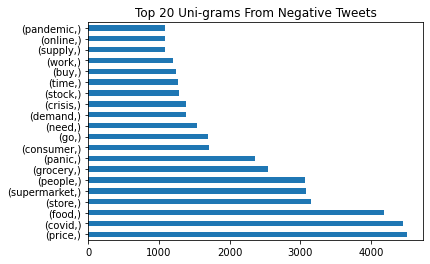

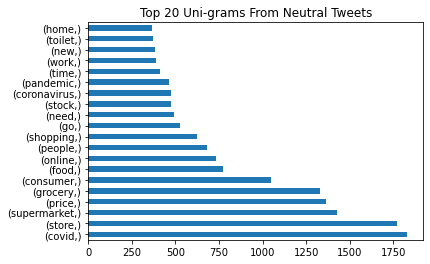

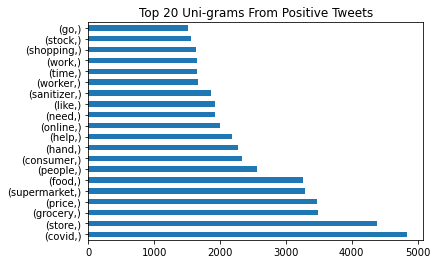

In [48]:
for sent in sents:
    nGramsCreator(Sentiment=sent)
    
    

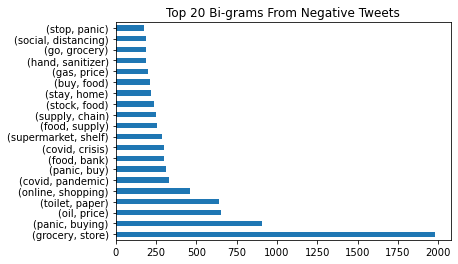

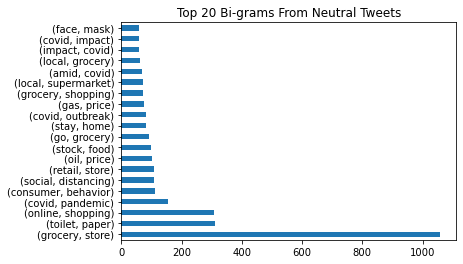

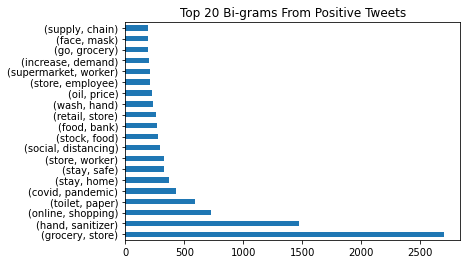

In [49]:
for sent in sents:
    nGramsCreator(Sentiment=sent, n=2)
    

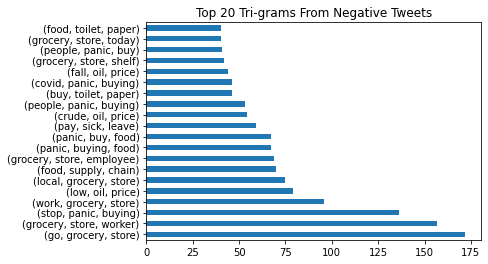

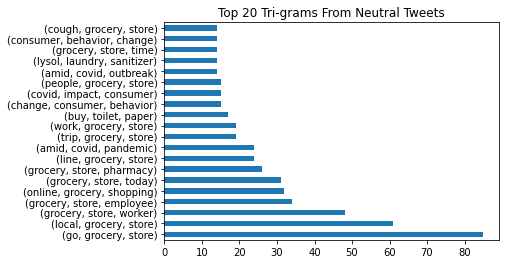

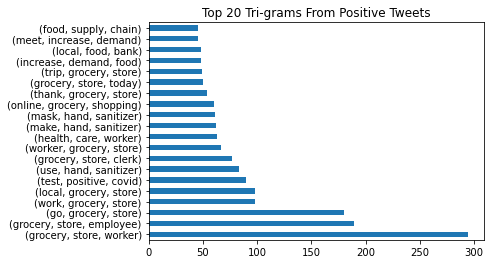

In [50]:
for sent in sents:
    nGramsCreator(Sentiment=sent, n=3)

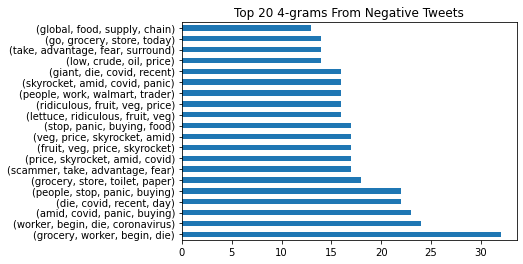

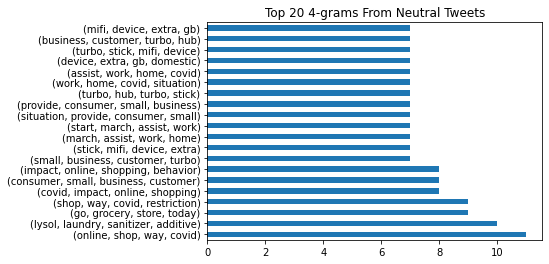

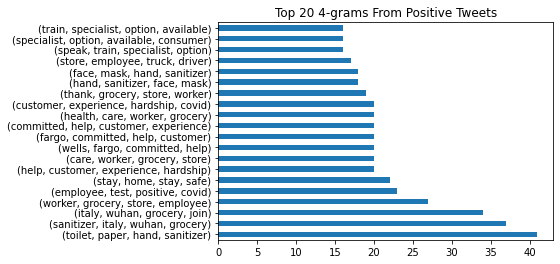

In [51]:
for sent in sents:
    nGramsCreator(Sentiment=sent, n=4)

## Classification

In [9]:
#Inserting the Sentiment column into the new data frame. A 3-class Sentiment column was also created to have Negative, Neutral, and Positive classes.
data["SentToInt"] = data["Sentiment"].map({"Neutral":2, "Positive":3, "Negative":1, "Extremely Negative":0, "Extremely Positive":4})
data["Sentiment2"]= data["Sentiment"].map({"Neutral":"Neutral", "Positive":"Positive", "Negative":"Negative", "Extremely Negative":"Negative", "Extremely Positive":"Positive"})
data["Sent2ToInt"] = data["Sentiment2"].map({"Neutral":1, "Positive":2, "Negative":0})
data[['Sentiment', 'SentToInt', 'Sentiment2', 'Sent2ToInt']].head()

,Sentiment,SentToInt,Sentiment2,Sent2ToInt
0,Neutral,2,Neutral,1
1,Positive,3,Positive,2
2,Positive,3,Positive,2
3,Positive,3,Positive,2
4,Extremely Negative,0,Negative,0


In [10]:
classCol = 'Sentiment2'
featureName = 'CleanedTweet'
X = data[featureName]
y = data[classCol]


In [54]:
from sklearn.model_selection import train_test_split
classCol = 'Sentiment2'
X_train,X_test, y_train,y_test  = train_test_split(X,y, test_size=0.15,
                                                   stratify=data[classCol],
                                                   random_state=41)


### Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def nbClf(vect=CountVectorizer, nGrams=(1,1)):
    
    
    pipe = Pipeline([('vectorizer', vect(stop_words='english', ngram_range=nGrams)),                 
                       ('clf', MultinomialNB())])

    params = {'vectorizer__max_df': (0.5, 1.0),       
                'clf__alpha':(0.01,0.1,1)}

    grid_search = GridSearchCV(pipe, params, verbose=0)

    grid_search.fit(X_train, y_train)

    #Best score and parameters
    print("Best Parameters:\n")
    for k,v in grid_search.best_params_.items():
        print(f"\t{k} : {v}")
    print()
    print(f"Best Score: {grid_search.best_score_}")


    #Best estimator
    print("\nPerformance on the test data")
    best_pipe = grid_search.best_estimator_

    best_pipe.fit(X_train, y_train)
    pred = best_pipe.predict(X_test)
    print()
    print(classification_report(y_test, pred))


In [56]:

# #Performing grid search based on CountVectorizer, n-grams=(1,1)

nbClf(vect=CountVectorizer, nGrams=(1,1))


Best Parameters:

	clf__alpha : 1
	vectorizer__max_df : 0.5

Best Score: 0.677893995881304

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73      2555
     Neutral       0.68      0.23      0.34      1250
    Positive       0.68      0.82      0.74      2939

    accuracy                           0.68      6744
   macro avg       0.68      0.60      0.60      6744
weighted avg       0.68      0.68      0.66      6744



In [57]:
#Performing grid search based on CountVectorizer, n-grams=(1,2)
nbClf(vect=CountVectorizer,nGrams=(1,2))


Best Parameters:

	clf__alpha : 0.1
	vectorizer__max_df : 0.5

Best Score: 0.6615634971804967

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.68      0.72      0.70      2555
     Neutral       0.59      0.39      0.47      1250
    Positive       0.69      0.76      0.72      2939

    accuracy                           0.67      6744
   macro avg       0.65      0.62      0.63      6744
weighted avg       0.67      0.67      0.67      6744



In [58]:
#Performing grid search based on CountVectorizer, n-grams=(1,3)

nbClf(vect=CountVectorizer, nGrams=(1,3))

Best Parameters:

	clf__alpha : 0.1
	vectorizer__max_df : 0.5

Best Score: 0.6529011242093222

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.67      0.71      0.69      2555
     Neutral       0.59      0.36      0.45      1250
    Positive       0.68      0.76      0.71      2939

    accuracy                           0.67      6744
   macro avg       0.65      0.61      0.62      6744
weighted avg       0.66      0.67      0.66      6744



In [59]:
#Performing grid search based on tf-idf, n-grams=(1,1)
nbClf(vect=TfidfVectorizer, nGrams=(1,1))

Best Parameters:

	clf__alpha : 0.1
	vectorizer__max_df : 0.5

Best Score: 0.6564079534163636

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.68      0.71      0.69      2555
     Neutral       0.68      0.21      0.32      1250
    Positive       0.65      0.82      0.73      2939

    accuracy                           0.66      6744
   macro avg       0.67      0.58      0.58      6744
weighted avg       0.67      0.66      0.64      6744



In [60]:
#Performing grid search based on tf-idf, n-grams=(1,2)
nbClf(vect=TfidfVectorizer, nGrams=(1,2))

Best Parameters:

	clf__alpha : 0.1
	vectorizer__max_df : 0.5

Best Score: 0.654340541399552

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.69      0.71      0.70      2555
     Neutral       0.76      0.19      0.30      1250
    Positive       0.64      0.83      0.73      2939

    accuracy                           0.67      6744
   macro avg       0.70      0.58      0.58      6744
weighted avg       0.68      0.67      0.64      6744



In [61]:
#Performing grid search based on tf-idf, n-grams=(1,3)
nbClf(vect=TfidfVectorizer, nGrams=(1,3))

Best Parameters:

	clf__alpha : 0.1
	vectorizer__max_df : 0.5

Best Score: 0.6480334289563967

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.69      0.70      0.69      2555
     Neutral       0.78      0.18      0.29      1250
    Positive       0.64      0.84      0.72      2939

    accuracy                           0.66      6744
   macro avg       0.70      0.57      0.57      6744
weighted avg       0.68      0.66      0.63      6744



### AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier

def adaClf(vect=CountVectorizer, nGrams=(1,1)):
    best_pipe = Pipeline([('vectorizer', vect(stop_words='english', ngram_range=nGrams)),                 
                   ('clf', AdaBoostClassifier(n_estimators=1000))])

#     params = {'vectorizer__max_df': (0.5,1.0),      
                        
#              #'clf__n_estimators': (100,200,1000)
             
#             }

#     grid_search = GridSearchCV(pipe, params, verbose=0)

#     grid_search.fit(X_train, y_train)

#     #Best score and parameters
#     print("Best Parameters:\n")
#     for k,v in grid_search.best_params_.items():
#         print(f"\t{k} : {v}")
#     print()
#     print(f"Best Score: {grid_search.best_score_}")


#     #Best estimator
    print("\nPerformance on the test data")
#     best_pipe = grid_search.best_estimator_

    best_pipe.fit(X_train, y_train)
    pred = best_pipe.predict(X_test)
    print()
    print(classification_report(y_test, pred))

In [63]:
#Performing grid search based on CountVectorizer, n-grams=(1,1)

adaClf(vect=CountVectorizer, nGrams=(1,1))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.86      0.77      0.81      2555
     Neutral       0.66      0.86      0.75      1250
    Positive       0.86      0.82      0.84      2939

    accuracy                           0.81      6744
   macro avg       0.79      0.82      0.80      6744
weighted avg       0.82      0.81      0.81      6744



In [64]:
#Performing grid search based on CountVectorizer, n-grams=(1,2)

adaClf(vect=CountVectorizer, nGrams=(1,2))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.85      0.78      0.81      2555
     Neutral       0.65      0.87      0.74      1250
    Positive       0.86      0.81      0.84      2939

    accuracy                           0.81      6744
   macro avg       0.79      0.82      0.80      6744
weighted avg       0.82      0.81      0.81      6744



In [65]:
#Performing grid search based on CountVectorizer, n-grams=(1,3)

adaClf(vect=CountVectorizer, nGrams=(1,3))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.86      0.78      0.82      2555
     Neutral       0.66      0.86      0.75      1250
    Positive       0.86      0.81      0.84      2939

    accuracy                           0.81      6744
   macro avg       0.79      0.82      0.80      6744
weighted avg       0.82      0.81      0.81      6744



In [66]:
#Performing grid search based on tf-idf, n-grams=(1,1)
adaClf(vect=TfidfVectorizer, nGrams=(1,1))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.84      0.76      0.80      2555
     Neutral       0.64      0.84      0.72      1250
    Positive       0.85      0.81      0.83      2939

    accuracy                           0.79      6744
   macro avg       0.77      0.80      0.78      6744
weighted avg       0.81      0.79      0.80      6744



In [67]:
#Performing grid search based on tf-idf, n-grams=(1,2)
adaClf(vect=TfidfVectorizer, nGrams=(1,2))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.83      0.73      0.78      2555
     Neutral       0.62      0.86      0.72      1250
    Positive       0.85      0.79      0.82      2939

    accuracy                           0.78      6744
   macro avg       0.77      0.80      0.77      6744
weighted avg       0.80      0.78      0.79      6744



In [68]:
#Performing grid search based on tf-idf, n-grams=(1,3)
adaClf(vect=TfidfVectorizer, nGrams=(1,3))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.83      0.71      0.77      2555
     Neutral       0.59      0.87      0.70      1250
    Positive       0.84      0.77      0.81      2939

    accuracy                           0.77      6744
   macro avg       0.75      0.79      0.76      6744
weighted avg       0.79      0.77      0.77      6744



### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

def rfClf(vect=CountVectorizer, nGrams=(1,1)):
    
    best_pipe = Pipeline([('vectorizer', vect(stop_words='english', ngram_range=nGrams)),                 
                   ('clf', RandomForestClassifier(n_estimators=200))])

#     params = {#'vectorizer__max_df': (0.5,1.0),      
                        
#              #'clf__n_estimators': (200,500,1000)
#              'clf__max_features':("auto", "sqrt", "log2")
#     }
             
             

#     grid_search = GridSearchCV(pipe, params, verbose=0)

#     grid_search.fit(X_train, y_train)

#     #Best score and parameters
#     print("Best Parameters:\n")
#     for k,v in grid_search.best_params_.items():
#         print(f"\t{k} : {v}")
#     print()
#     print(f"Best Score: {grid_search.best_score_}")


    #Best estimator
    print("\nPerformance on the test data")
    #best_pipe = grid_search.best_estimator_

    best_pipe.fit(X_train, y_train)
    pred = best_pipe.predict(X_test)
    print()
    print(classification_report(y_test, pred))

In [70]:
#Performing grid search based on CountVectorizer, n-grams=(1,1)

rfClf(vect=CountVectorizer, nGrams=(1,1))



Performance on the test data

              precision    recall  f1-score   support

    Negative       0.81      0.74      0.78      2555
     Neutral       0.66      0.81      0.73      1250
    Positive       0.83      0.81      0.82      2939

    accuracy                           0.79      6744
   macro avg       0.77      0.79      0.78      6744
weighted avg       0.79      0.79      0.79      6744



In [71]:
#Performing grid search based on CountVectorizer, n-grams=(1,2)
rfClf(vect=CountVectorizer, nGrams=(1,2))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.81      0.72      0.77      2555
     Neutral       0.65      0.81      0.72      1250
    Positive       0.82      0.81      0.81      2939

    accuracy                           0.78      6744
   macro avg       0.76      0.78      0.77      6744
weighted avg       0.78      0.78      0.78      6744



In [72]:
#Performing grid search based on CountVectorizer, n-grams=(1,3)
rfClf(vect=CountVectorizer, nGrams=(1,3))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.81      0.70      0.75      2555
     Neutral       0.63      0.82      0.71      1250
    Positive       0.81      0.80      0.80      2939

    accuracy                           0.77      6744
   macro avg       0.75      0.77      0.76      6744
weighted avg       0.78      0.77      0.77      6744



In [73]:
#Performing grid search based on tf-idf, n-grams=(1,1)
rfClf(vect=TfidfVectorizer, nGrams=(1,1))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.78      0.75      0.76      2555
     Neutral       0.68      0.69      0.69      1250
    Positive       0.78      0.81      0.80      2939

    accuracy                           0.76      6744
   macro avg       0.75      0.75      0.75      6744
weighted avg       0.76      0.76      0.76      6744



In [74]:
#Performing grid search based on tf-idf, n-grams=(1,2)
rfClf(vect=TfidfVectorizer, nGrams=(1,2))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.81      0.68      0.74      2555
     Neutral       0.57      0.79      0.66      1250
    Positive       0.80      0.78      0.79      2939

    accuracy                           0.74      6744
   macro avg       0.73      0.75      0.73      6744
weighted avg       0.76      0.74      0.75      6744



In [75]:
#Performing grid search based on tf-idf, n-grams=(1,3)
rfClf(vect=TfidfVectorizer, nGrams=(1,3))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.83      0.61      0.70      2555
     Neutral       0.46      0.87      0.60      1250
    Positive       0.82      0.69      0.75      2939

    accuracy                           0.70      6744
   macro avg       0.70      0.73      0.69      6744
weighted avg       0.76      0.70      0.71      6744



### LSTM

In [12]:
y = data['Sent2ToInt']
targetLabels = ['Negative', 'Neutral', 'Positive']

In [13]:
#Tokenizing and vectorizing the tweets by kers functions
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

X = pad_sequences(X, padding='post')
# y = y.reshape((-1,1))
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
wordSize = len(tokenizer.word_index)+1

X shape: (44955, 63)
y shape: (44955,)


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,
                                                  test_size=0.15,
                                                  stratify=y, 
                                                  random_state=41)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (38211, 63)
y_train shape: (38211,)
X_test shape: (6744, 63)
y_test shape: (6744,)


In [15]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, GlobalMaxPool1D,BatchNormalization, Dropout
from keras.losses import SparseCategoricalCrossentropy


def rnnModel(embedding_dim = 100,hidden_dim = 100,lstm_2=False,
           n_dense_layers=0,n_nodes=64,denseLayerAct='relu',
           use_batchNorm=False,use_dropout=False,dropProb=0.5):
    
    
    model = Sequential()
    model.add(Embedding(wordSize, embedding_dim, input_length=X_train.shape[1]))
    model.add(Bidirectional(LSTM(hidden_dim, return_sequences=True)))
    if lstm_2:
        model.add(Bidirectional(LSTM(int(hidden_dim/2), return_sequences=True)))
        
    model.add(GlobalMaxPool1D())
    # Add intermediate dense layers
    if n_dense_layers > 0:
        for i in range(n_dense_layers):
            model.add(Dense(n_nodes/(2^i), activation = denseLayerAct))
            if use_batchNorm:
                model.add(BatchNormalization())
            if use_dropout:
                model.add(Dropout(dropProb))
    
    model.add(Dense(3, activation = 'softmax'))       

    # Compile model
    model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy'])
    return model




#This function is taken from deep learning labs
import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()


#### Model1

In [80]:
model1 = rnnModel()
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 63, 100)           4058800   
_________________________________________________________________
bidirectional (Bidirectional (None, 63, 200)           160800    
_________________________________________________________________
global_max_pooling1d (Global (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
Total params: 4,220,203
Trainable params: 4,220,203
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
batch_size = 32
epochs = 5


history1 = model1.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)
                    


Epoch 1/5
1075/1075 [==============================] - 92s 85ms/step - loss: 0.8286 - accuracy: 0.7122 - val_loss: 0.7162 - val_accuracy: 0.8331
Epoch 2/5
1075/1075 [==============================] - 93s 86ms/step - loss: 0.6669 - accuracy: 0.8836 - val_loss: 0.6895 - val_accuracy: 0.8608
Epoch 3/5
1075/1075 [==============================] - 93s 87ms/step - loss: 0.6333 - accuracy: 0.9181 - val_loss: 0.6833 - val_accuracy: 0.8666
Epoch 4/5
1075/1075 [==============================] - 94s 88ms/step - loss: 0.6170 - accuracy: 0.9346 - val_loss: 0.6792 - val_accuracy: 0.8715
Epoch 5/5
1075/1075 [==============================] - 95s 88ms/step - loss: 0.6077 - accuracy: 0.9440 - val_loss: 0.6811 - val_accuracy: 0.8671


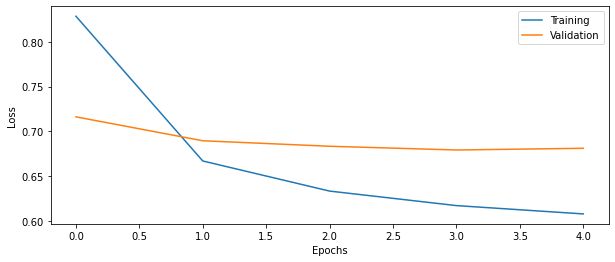

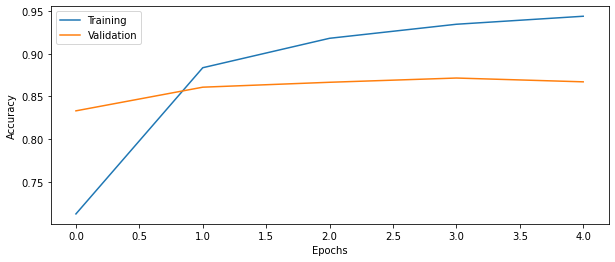

In [82]:
plot_results(history1)

In [83]:
pred1 = model1.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred1, target_names=targetLabels))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.84      0.90      0.87      2555
     Neutral       0.88      0.81      0.84      1250
    Positive       0.90      0.87      0.88      2939

    accuracy                           0.87      6744
   macro avg       0.87      0.86      0.87      6744
weighted avg       0.87      0.87      0.87      6744



#### Model2

In [84]:
model2 = rnnModel(n_dense_layers=1)
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 63, 100)           4058800   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 63, 200)           160800    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                6432      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 4,226,131
Trainable params: 4,226,131
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
batch_size = 32
epochs = 5
history2 = model2.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)
                    


Epoch 1/5
1075/1075 [==============================] - 94s 88ms/step - loss: 0.8962 - accuracy: 0.6391 - val_loss: 0.7489 - val_accuracy: 0.8012
Epoch 2/5
1075/1075 [==============================] - 94s 88ms/step - loss: 0.6908 - accuracy: 0.8587 - val_loss: 0.6946 - val_accuracy: 0.8540
Epoch 3/5
1075/1075 [==============================] - 95s 88ms/step - loss: 0.6467 - accuracy: 0.9038 - val_loss: 0.6903 - val_accuracy: 0.8598
Epoch 4/5
1075/1075 [==============================] - 94s 88ms/step - loss: 0.6273 - accuracy: 0.9233 - val_loss: 0.6871 - val_accuracy: 0.8619
Epoch 5/5
1075/1075 [==============================] - 94s 88ms/step - loss: 0.6169 - accuracy: 0.9345 - val_loss: 0.6814 - val_accuracy: 0.8689


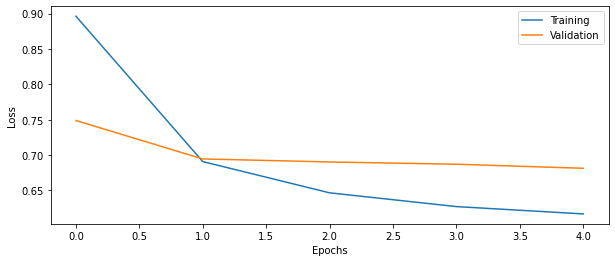

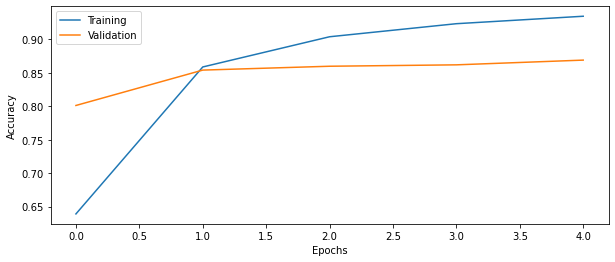

In [86]:
plot_results(history2)

In [87]:
pred2 = model2.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred2, target_names=targetLabels))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.88      0.85      0.86      2555
     Neutral       0.86      0.82      0.84      1250
    Positive       0.86      0.90      0.88      2939

    accuracy                           0.87      6744
   macro avg       0.87      0.86      0.86      6744
weighted avg       0.87      0.87      0.87      6744



#### Model3

In [88]:
model3 = rnnModel(n_dense_layers=2,use_batchNorm=True ,use_dropout=True, dropProb=0.5)
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 63, 100)           4058800   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 63, 200)           160800    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                6432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 21)               

In [89]:
batch_size = 32
epochs = 5
history3 = model3.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)
                    


Epoch 1/5
1075/1075 [==============================] - 96s 89ms/step - loss: 0.9293 - accuracy: 0.6035 - val_loss: 0.8267 - val_accuracy: 0.7156
Epoch 2/5
1075/1075 [==============================] - 95s 88ms/step - loss: 0.7638 - accuracy: 0.7862 - val_loss: 0.9530 - val_accuracy: 0.5816
Epoch 3/5
1075/1075 [==============================] - 95s 89ms/step - loss: 0.7277 - accuracy: 0.8224 - val_loss: 0.7527 - val_accuracy: 0.7949
Epoch 4/5
1075/1075 [==============================] - 95s 88ms/step - loss: 0.7051 - accuracy: 0.8444 - val_loss: 0.7180 - val_accuracy: 0.8302
Epoch 5/5
1075/1075 [==============================] - 95s 88ms/step - loss: 0.6917 - accuracy: 0.8578 - val_loss: 0.7145 - val_accuracy: 0.8344


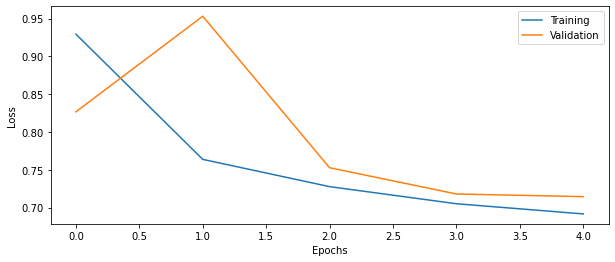

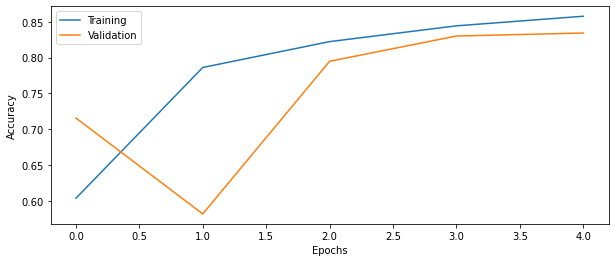

In [90]:
plot_results(history3)

In [91]:
pred3 = model3.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred3, target_names=targetLabels))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.86      0.81      0.83      2555
     Neutral       0.85      0.78      0.81      1250
    Positive       0.81      0.89      0.85      2939

    accuracy                           0.84      6744
   macro avg       0.84      0.83      0.83      6744
weighted avg       0.84      0.84      0.84      6744



#### Model4

In [92]:
model4 = rnnModel(embedding_dim=264,n_dense_layers=1)
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 63, 264)           10715232  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 63, 200)           292000    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                6432      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 11,013,763
Trainable params: 11,013,763
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
batch_size = 16
epochs = 10
history4 = model4.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)
                    

Epoch 1/10
2150/2150 [==============================] - 339s 158ms/step - loss: 0.8063 - accuracy: 0.7347 - val_loss: 0.7199 - val_accuracy: 0.8281
Epoch 2/10
2150/2150 [==============================] - 339s 158ms/step - loss: 0.6799 - accuracy: 0.8699 - val_loss: 0.7039 - val_accuracy: 0.8438
Epoch 3/10
2150/2150 [==============================] - 341s 158ms/step - loss: 0.6474 - accuracy: 0.9024 - val_loss: 0.6968 - val_accuracy: 0.8511
Epoch 4/10
2150/2150 [==============================] - 341s 159ms/step - loss: 0.6288 - accuracy: 0.9217 - val_loss: 0.6863 - val_accuracy: 0.8608
Epoch 5/10
2150/2150 [==============================] - 341s 158ms/step - loss: 0.6160 - accuracy: 0.9348 - val_loss: 0.6900 - val_accuracy: 0.8613
Epoch 6/10
2150/2150 [==============================] - 340s 158ms/step - loss: 0.6081 - accuracy: 0.9432 - val_loss: 0.6948 - val_accuracy: 0.8537
Epoch 7/10
2150/2150 [==============================] - 340s 158ms/step - loss: 0.6044 - accuracy: 0.9466 - val_

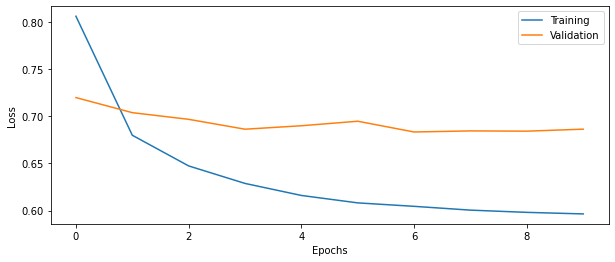

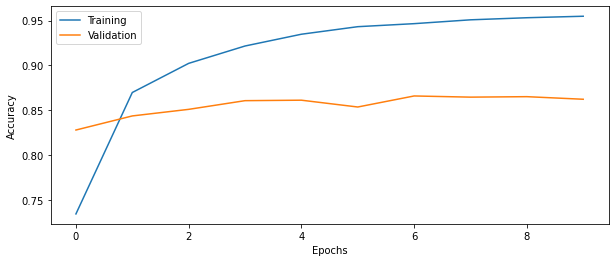

In [94]:
plot_results(history4)

In [95]:
pred4 = model4.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred4, target_names=targetLabels))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      2555
     Neutral       0.85      0.84      0.85      1250
    Positive       0.87      0.89      0.88      2939

    accuracy                           0.87      6744
   macro avg       0.87      0.86      0.86      6744
weighted avg       0.87      0.87      0.87      6744



#### Model5

In [96]:
model5 = rnnModel(embedding_dim=264, lstm_2=True,n_dense_layers=2,use_dropout=True, dropProb=0.4 )
print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 63, 264)           10715232  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 63, 200)           292000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 63, 100)           100400    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 21)               

Epoch 1/10
2150/2150 [==============================] - 392s 182ms/step - loss: 0.9243 - accuracy: 0.6065 - val_loss: 0.7687 - val_accuracy: 0.7794
Epoch 2/10
2150/2150 [==============================] - 396s 184ms/step - loss: 0.7443 - accuracy: 0.8070 - val_loss: 0.7640 - val_accuracy: 0.7865
Epoch 3/10
2150/2150 [==============================] - 399s 185ms/step - loss: 0.7160 - accuracy: 0.8353 - val_loss: 0.7556 - val_accuracy: 0.7949
Epoch 4/10
2150/2150 [==============================] - 399s 185ms/step - loss: 0.7020 - accuracy: 0.8492 - val_loss: 0.7427 - val_accuracy: 0.8074
Epoch 5/10
2150/2150 [==============================] - 399s 186ms/step - loss: 0.6889 - accuracy: 0.8620 - val_loss: 0.7318 - val_accuracy: 0.8184
Epoch 6/10
2150/2150 [==============================] - 397s 185ms/step - loss: 0.6780 - accuracy: 0.8727 - val_loss: 0.7269 - val_accuracy: 0.8231
Epoch 7/10
2150/2150 [==============================] - 399s 186ms/step - loss: 0.6663 - accuracy: 0.8847 - val_

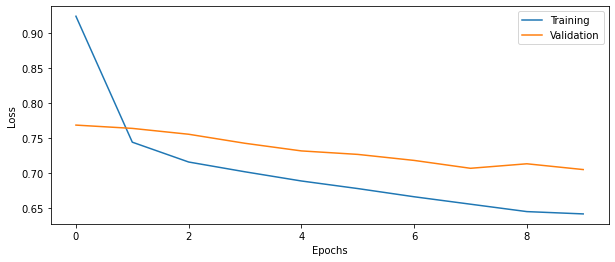

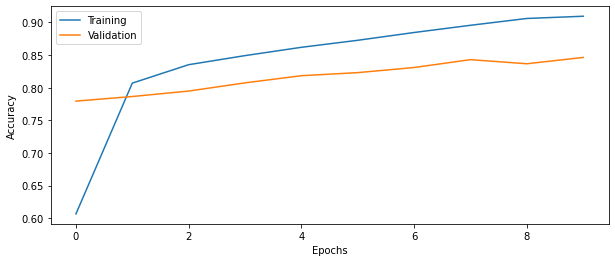

In [97]:
batch_size = 16
epochs = 10
history5 = model5.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)

plot_results(history5)

In [98]:
pred5 = model5.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred5, target_names=targetLabels))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85      2555
     Neutral       0.82      0.76      0.79      1250
    Positive       0.85      0.85      0.85      2939

    accuracy                           0.84      6744
   macro avg       0.83      0.82      0.83      6744
weighted avg       0.84      0.84      0.84      6744



#### Model6

In [16]:
model6 = rnnModel(embedding_dim=200, hidden_dim=200, n_dense_layers=2, denseLayerAct='sigmoid',n_nodes=128)
print(model6.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 63, 200)           8117600   
_________________________________________________________________
bidirectional (Bidirectional (None, 63, 400)           641600    
_________________________________________________________________
global_max_pooling1d (Global (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                25664     
_________________________________________________________________
dense_1 (Dense)              (None, 42)                2730      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 129       
Total params: 8,787,723
Trainable params: 8,787,723
Non-trainable params: 0
______________________________________________

Epoch 1/10
1075/1075 [==============================] - 229s 213ms/step - loss: 0.9421 - accuracy: 0.5861 - val_loss: 0.7929 - val_accuracy: 0.7627
Epoch 2/10
1075/1075 [==============================] - 218s 203ms/step - loss: 0.7436 - accuracy: 0.8070 - val_loss: 0.7234 - val_accuracy: 0.8265
Epoch 3/10
1075/1075 [==============================] - 220s 205ms/step - loss: 0.6873 - accuracy: 0.8626 - val_loss: 0.7159 - val_accuracy: 0.8323
Epoch 4/10
1075/1075 [==============================] - 226s 210ms/step - loss: 0.6589 - accuracy: 0.8916 - val_loss: 0.7059 - val_accuracy: 0.8438
Epoch 5/10
1075/1075 [==============================] - 231s 215ms/step - loss: 0.6387 - accuracy: 0.9123 - val_loss: 0.6983 - val_accuracy: 0.8524
Epoch 6/10
1075/1075 [==============================] - 235s 218ms/step - loss: 0.6266 - accuracy: 0.9245 - val_loss: 0.6980 - val_accuracy: 0.8503
Epoch 7/10
1075/1075 [==============================] - 226s 210ms/step - loss: 0.6221 - accuracy: 0.9288 - val_

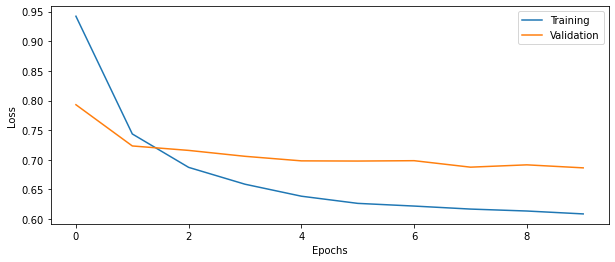

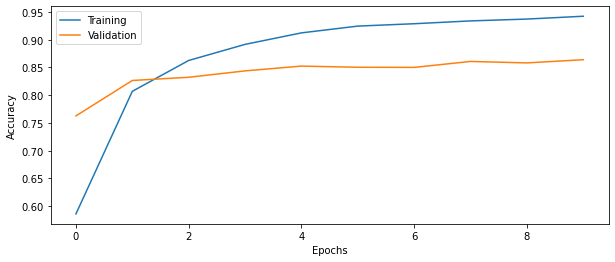

In [17]:
batch_size = 32
epochs = 10
history6 = model6.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)

plot_results(history6)

In [18]:
pred6 = model6.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred6, target_names=targetLabels))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

Performance on the test data

              precision    recall  f1-score   support

    Negative       0.87      0.88      0.87      2555
     Neutral       0.86      0.82      0.84      1250
    Positive       0.88      0.89      0.88      2939

    accuracy                           0.87      6744
   macro avg       0.87      0.86      0.86      6744
weighted avg       0.87      0.87      0.87      6744



#### model7

In [19]:
model7 = rnnModel(embedding_dim=200)
print(model7.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 63, 200)           8117600   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 63, 200)           240800    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 8,359,003
Trainable params: 8,359,003
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
538/538 [==============================] - 88s 164ms/step - loss: 0.8450 - accuracy: 0.6963 - val_loss: 0.7119 - val_accuracy: 0.8383
Epoch 2/10
538/538 [==============================] - 91s 169ms/step - loss: 0.6652 - accuracy: 0.8854 - val_loss: 0.6892 - val_accuracy: 0.8598
Epoch 3/10
538/538 [==============================] - 88s 164ms/step - loss: 0.6309 - accuracy: 0.9209 - val_loss: 0.6839 - val_accuracy: 0.8642
Epoch 4/10
538/538 [==============================] - 88s 163ms/step - loss: 0.6140 - accuracy: 0.9375 - val_loss: 0.6815 - val_accuracy: 0.8692
Epoch 5/10
538/538 [==============================] - 89s 165ms/step - loss: 0.6056 - accuracy: 0.9461 - val_loss: 0.6831 - val_accuracy: 0.8671
Epoch 6/10
538/538 [==============================] - 88s 163ms/step - loss: 0.6014 - accuracy: 0.9500 - val_loss: 0.6826 - val_accuracy: 0.8684
Epoch 7/10
538/538 [==============================] - 86s 161ms/step - loss: 0.5983 - accuracy: 0.9533 - val_loss: 0.6806 - val_ac

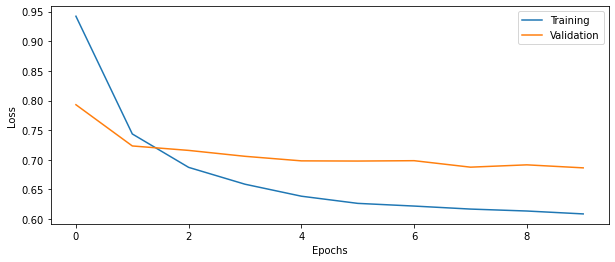

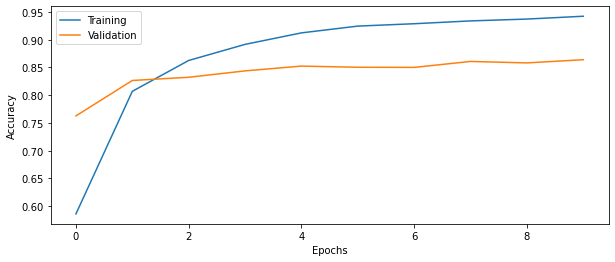

In [20]:
batch_size = 64
epochs = 10
history7 = model7.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)

plot_results(history6)

In [21]:
pred7 = model7.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred7, target_names=targetLabels))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.85      0.90      0.87      2555
     Neutral       0.87      0.83      0.85      1250
    Positive       0.90      0.87      0.88      2939

    accuracy                           0.87      6744
   macro avg       0.87      0.86      0.87      6744
weighted avg       0.87      0.87      0.87      6744



#### model8

In [22]:
model8 = rnnModel()
print(model8.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 63, 100)           4058800   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 63, 200)           160800    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 603       
Total params: 4,220,203
Trainable params: 4,220,203
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/7
538/538 [==============================] - 61s 114ms/step - loss: 0.9342 - accuracy: 0.6006 - val_loss: 0.8371 - val_accuracy: 0.7216
Epoch 2/7
538/538 [==============================] - 64s 119ms/step - loss: 0.7179 - accuracy: 0.8353 - val_loss: 0.7021 - val_accuracy: 0.8493
Epoch 3/7
538/538 [==============================] - 61s 113ms/step - loss: 0.6480 - accuracy: 0.9032 - val_loss: 0.6933 - val_accuracy: 0.8558
Epoch 4/7
538/538 [==============================] - 62s 115ms/step - loss: 0.6240 - accuracy: 0.9278 - val_loss: 0.6879 - val_accuracy: 0.8608
Epoch 5/7
538/538 [==============================] - 61s 113ms/step - loss: 0.6127 - accuracy: 0.9389 - val_loss: 0.6912 - val_accuracy: 0.8574
Epoch 6/7
538/538 [==============================] - 61s 114ms/step - loss: 0.6070 - accuracy: 0.9446 - val_loss: 0.6875 - val_accuracy: 0.8605
Epoch 7/7
538/538 [==============================] - 61s 113ms/step - loss: 0.6028 - accuracy: 0.9487 - val_loss: 0.6791 - val_accuracy:

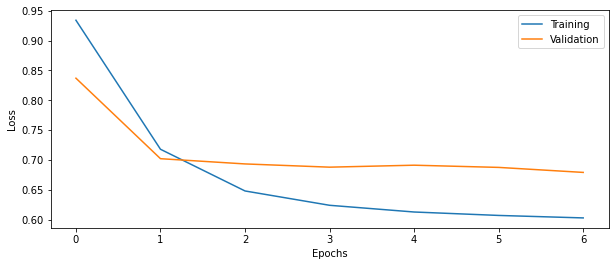

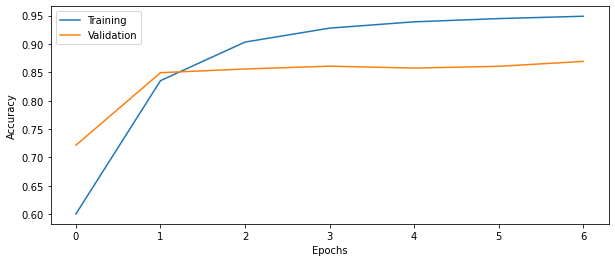

In [23]:
batch_size = 64
epochs = 7


history8 = model8.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)
                    
plot_results(history8)

In [24]:
pred8 = model8.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred8, target_names=targetLabels))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87      2555
     Neutral       0.87      0.84      0.85      1250
    Positive       0.88      0.88      0.88      2939

    accuracy                           0.87      6744
   macro avg       0.87      0.87      0.87      6744
weighted avg       0.87      0.87      0.87      6744



#### model9

In [25]:
model9 = rnnModel()
print(model9.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 63, 100)           4058800   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 63, 200)           160800    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 603       
Total params: 4,220,203
Trainable params: 4,220,203
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/7
2150/2150 [==============================] - 153s 71ms/step - loss: 0.7970 - accuracy: 0.7445 - val_loss: 0.7048 - val_accuracy: 0.8462
Epoch 2/7
2150/2150 [==============================] - 150s 70ms/step - loss: 0.6670 - accuracy: 0.8831 - val_loss: 0.7016 - val_accuracy: 0.8454
Epoch 3/7
2150/2150 [==============================] - 152s 71ms/step - loss: 0.6344 - accuracy: 0.9168 - val_loss: 0.6917 - val_accuracy: 0.8566
Epoch 4/7
2150/2150 [==============================] - 150s 70ms/step - loss: 0.6158 - accuracy: 0.9356 - val_loss: 0.6848 - val_accuracy: 0.8650
Epoch 5/7
2150/2150 [==============================] - 151s 70ms/step - loss: 0.6061 - accuracy: 0.9454 - val_loss: 0.6932 - val_accuracy: 0.8543
Epoch 6/7
2150/2150 [==============================] - 145s 67ms/step - loss: 0.6003 - accuracy: 0.9511 - val_loss: 0.6833 - val_accuracy: 0.8647
Epoch 7/7
2150/2150 [==============================] - 152s 71ms/step - loss: 0.5962 - accuracy: 0.9551 - val_loss: 0.6763 -

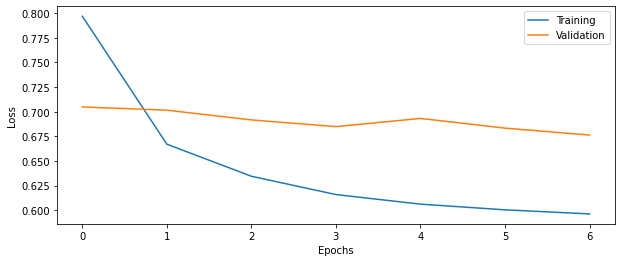

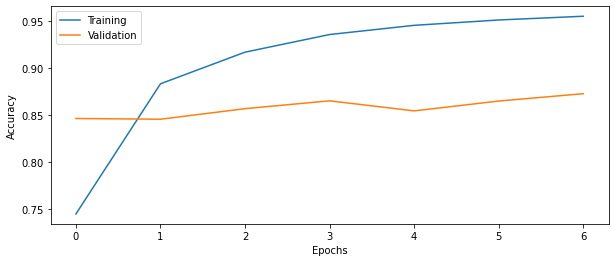

In [26]:
batch_size = 16
epochs = 7


history9 = model9.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                   validation_split=0.1)
                    
plot_results(history9)

In [27]:
pred9 = model9.predict_classes(X_test)
print("\nPerformance on the test data\n")
print(classification_report(y_test, pred9, target_names=targetLabels))


Performance on the test data

              precision    recall  f1-score   support

    Negative       0.89      0.86      0.88      2555
     Neutral       0.87      0.83      0.85      1250
    Positive       0.87      0.91      0.89      2939

    accuracy                           0.88      6744
   macro avg       0.88      0.87      0.87      6744
weighted avg       0.88      0.88      0.88      6744

